# Final Exam Project Submission

### Course: COMPSCIX433.6-021
#### Submission Due Date: Thursday August 24, 2023 

### Title: Uncovering Insights: A Data-driven Analysis & Visualization of Insurance Data

### Insurance Dataset
> Provides customer insurance data to help predict if the customer will be interested in Vehicle Insurance

### Team Members: Ryan Nichols and Joe Fernandez

### Problem Statement

### Context :

Insurance companies that sell life, health, and property and casualty insurance are using machine learning (ML) to drive improvements in customer service, fraud detection, and operational efficiency. The data provided by an Insurance company which is not excluded from other companies to getting advantage of ML. This company provides Health Insurance to its customers. We can build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

### Goal : Predict if the policyholders (customers) will be interested in Vehicle Insurance

Reference: https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice

### Task:

> #### 1. Perform an Exploratory Data Analysis and visualize the data
> #### 2. Apply Machine Learning Models learned in the class and make predictions
> #### 3. Provide conclusion based on the results
> #### 4. Outline an approach to convert the learning into a business solution
> 
### Available Datasets:
> Use `insurance_train.csv` as Training dataset to apply various ML models
>
> Use `insurance_test.csv` as Test dataset to validate the accuracy of the ML models 

In [1]:
# Import required Python Packages to perform exploratory data analysis and visualize the data
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import randint

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# sklearn Models

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

#### Load the training dataset

In [2]:
df_train = pd.read_csv("insurance_train.csv")
df_test = pd.read_csv("insurance_test.csv")

df_train_copy = df_train.copy(deep=True)
df_test_copy = df_test.copy(deep=True)

In [3]:
df_train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


In [4]:
df_train.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
382144,340265,Male,24,1,49.0,0,< 1 Year,Yes,2630.0,160.0,273,0
382145,213608,Female,25,1,6.0,1,< 1 Year,No,22911.0,152.0,131,0
382146,157507,Male,56,1,17.0,0,1-2 Year,Yes,45936.0,124.0,244,0
382147,498091,Female,48,1,28.0,0,1-2 Year,Yes,42805.0,26.0,80,1
382148,89317,Male,47,1,43.0,0,1-2 Year,Yes,32774.0,124.0,105,0
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0
382153,401019,Female,29,1,18.0,1,< 1 Year,No,30396.0,152.0,104,0


In [5]:
# Let's find out the total number of rows and columns in this dataframe
df_train.shape

(382154, 12)

There are 382,154 rows and 12 columns in this Insurance Analysis dataset

In [6]:
# Let's explore the columns in the dataframe
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [7]:
# Let's also explore the data types and other details for this dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


#### Information in the Training dataset
The dataset provides the following information:
> ##### Demographics:  Gender, Age, Region Code Type, has a Driving License
>
> ##### Vehicles: Vehicle Age, Damage, Previously Insured
>
> ##### Policy: Premium, Sourcing Channel, Vintage

In [8]:
# Identify all numerical features and categorical features

# Numerical Features:
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)

# Categorical Features:

categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
print('\nThe Categorical features in the Insurance Dataset are:')
print(categorical_features)

The numerical features in the Insurance Dataset are:
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

The Categorical features in the Insurance Dataset are:
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [9]:
# Get statistical data for all the numerical features

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,382154.0,234392.953477,139527.487326,1.0,115006.25,230461.5,345434.75,508145.0
Age,382154.0,38.545691,15.226897,20.0,25.00,36.0,49.00,85.0
Driving_License,382154.0,0.998108,0.043455,0.0,1.00,1.0,1.00,1.0
Region_Code,382154.0,26.406867,13.181241,0.0,15.00,28.0,35.00,52.0
Previously_Insured,382154.0,0.489182,0.499884,0.0,0.00,0.0,1.00,1.0
Annual_Premium,382154.0,30711.271362,17061.595532,2630.0,24546.00,31692.0,39447.75,540165.0
Policy_Sales_Channel,382154.0,111.939812,54.286511,1.0,26.00,145.0,152.00,163.0
Vintage,382154.0,154.189429,83.735107,10.0,81.00,154.0,227.00,299.0
Response,382154.0,0.163811,0.370104,0.0,0.00,0.0,0.00,1.0


In [10]:
# Get statistical data for all the Categorical features

df_train.describe(include=['O']).T

,count,unique,top,freq
Gender,382154,2,Male,205603
Vehicle_Age,382154,3,1-2 Year,200176
Vehicle_Damage,382154,2,No,198501


Looking at the above data, we can see that all columns have 100% data. While this is good, let's ensure we don't have any null values. If we do, then we have to apply some data manipulation on the dataset

In [11]:
# Check if each column has any null values

df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
# Alternate way to check for null values. 
# If any column has null values, it will result in True
df_train.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

Based on the above data, it looks like we don't have any columns with null values\
Now let's find out how many unique values are in each column\
Note that we have 382,154 rows in the dataset

In [13]:
# Find the count of unique values in the dataset

for col in df_train.columns:
    print(f'The column {col} has {df_train[col].nunique()} unique values')

The column id has 382154 unique values
The column Gender has 2 unique values
The column Age has 66 unique values
The column Driving_License has 2 unique values
The column Region_Code has 53 unique values
The column Previously_Insured has 2 unique values
The column Vehicle_Age has 3 unique values
The column Vehicle_Damage has 2 unique values
The column Annual_Premium has 48993 unique values
The column Policy_Sales_Channel has 156 unique values
The column Vintage has 290 unique values
The column Response has 2 unique values


In [14]:
# Let's explore Driving License column
df_train.Driving_License.unique()

array([1, 0])

In [15]:
# There are two values 0 and 1. 
df_train.Driving_License.value_counts()

1    381431
0       723
Name: Driving_License, dtype: int64

In [16]:
# Similarly, let's explore Previously Insured column
df_train.Previously_Insured.unique()

array([1, 0])

In [17]:
# There are two values 0 and 1. 
df_train.Previously_Insured.value_counts()

0    195211
1    186943
Name: Previously_Insured, dtype: int64

In [18]:
# Simiarly, let's explore Vehicle Damage column
df_train.Vehicle_Damage.unique()

array(['No', 'Yes'], dtype=object)

In [19]:
# There are two values 'Yes' and 'No'. 
df_train.Vehicle_Damage.value_counts()

No     198501
Yes    183653
Name: Vehicle_Damage, dtype: int64

In [20]:
# Let's also explore Vehicle Age column
df_train.Vehicle_Age.unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [21]:
# There are two values '< 1 Year', '1-2 Year' and '> 2 Years'. 
df_train.Vehicle_Age.value_counts()

1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: Vehicle_Age, dtype: int64

Most of the cars are less than 2 years old

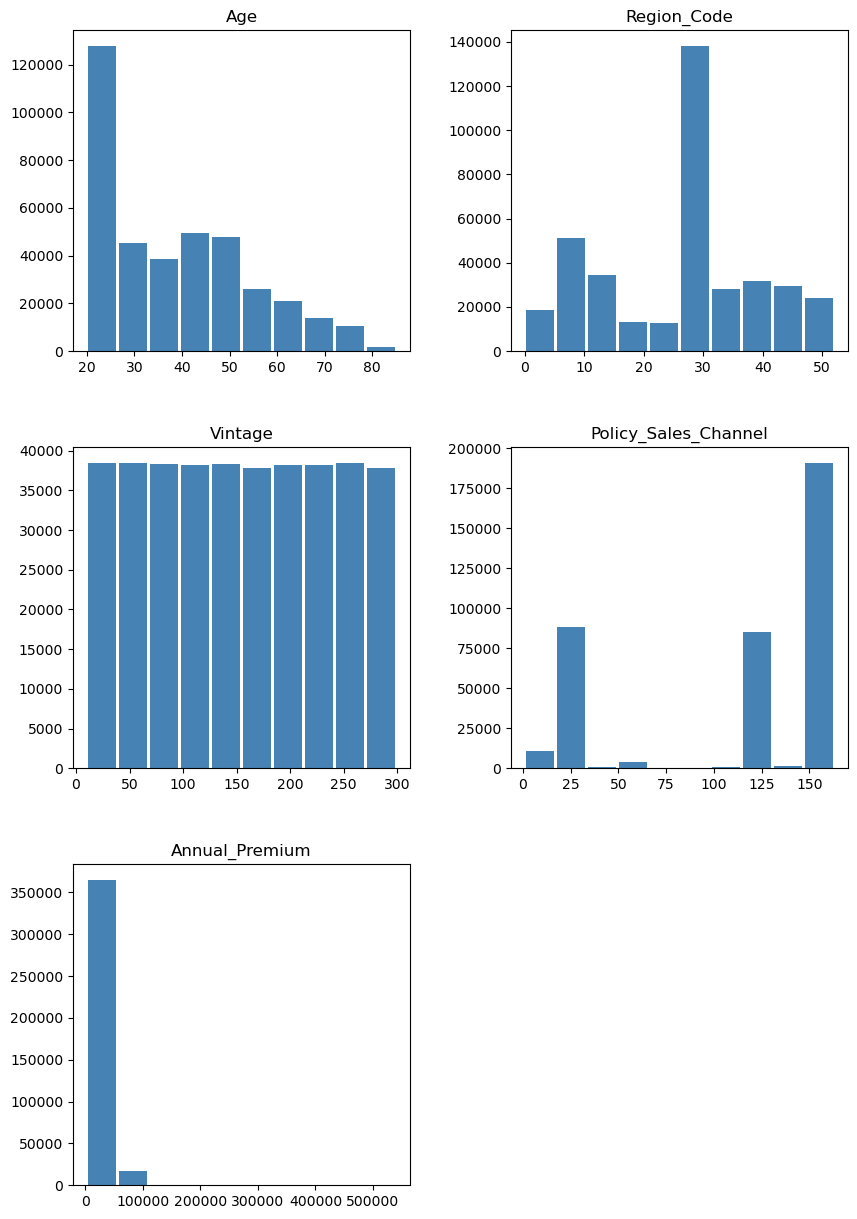

In [22]:
df_train.hist(column=['Age','Region_Code',
                      'Vintage','Policy_Sales_Channel',
                      'Annual_Premium'], 
              color='steelblue', # many options, some to consider are
                            # ['aqua', 'red', 'gold', 'royalblue', 
                            #'darkorange', 'green', 'purple', 
                            #'steelblue', 'yellow', 'lime', 'magenta']
              #edgecolor='black', # color of the edge line for the bars
              figsize=(10,15), #(x axis and y axis in inches)
              bins=10, # number of bins to divide the data into
              rwidth=0.9, # width between each bin
              grid=False # to remove the grid for cleaner visualization
             )
plt.show()

In [23]:
print('Annual Premium : Min =', df_train['Annual_Premium'].min(), 
      'and Max =',df_train['Annual_Premium'].max())

Annual Premium : Min = 2630.0 and Max = 540165.0


In [24]:
# Total number of rows above Annual Premium of 100,000
xc = df_train.loc[df_train['Annual_Premium'] > 100000, ['Annual_Premium']].count()
print('Total number of records with Annual Premium above 100,000 is', xc[0])

Total number of records with Annual Premium above 100,000 is 793


In [25]:
# Let's pull all data below 90,000 and plot them to zoom into the tall bar for Annual Premium
x_AP = df_train.loc[df_train['Annual_Premium'] <= 100000]

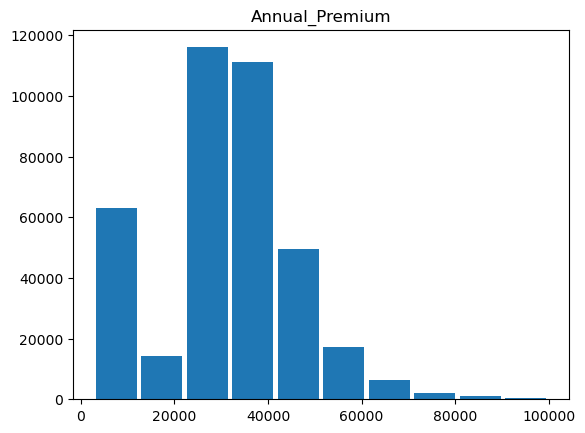

In [26]:
# Zoom into the Annual Premium below 100,000 

x_AP.hist(column=['Annual_Premium'], 
               bins = 10,
               rwidth=0.9, # width between each bin
               grid=False # to remove the grid for cleaner visualization
              )
plt.show()

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

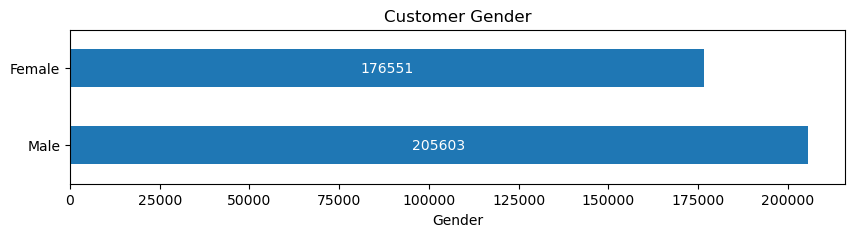

In [27]:
# Let's look at the break up of Gender in the dataset

ax = df_train.Gender.value_counts().plot(kind='barh', figsize=(10,2), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Customer Gender')
plt.xlabel('Gender')
plt.show()

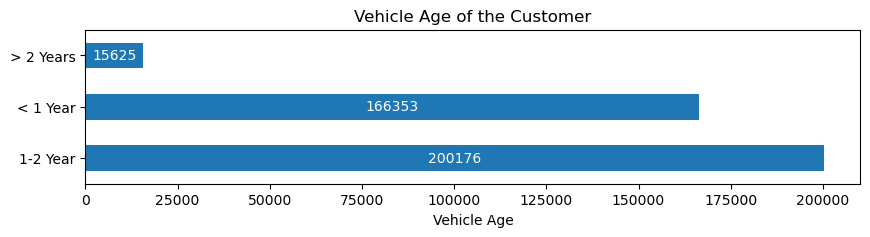

In [28]:
# Let's also look at the Vehicle Age and see how these are broken up

ax = df_train.Vehicle_Age.value_counts().plot(kind='barh', figsize=(10,2), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Vehicle Age of the Customer')
plt.xlabel('Vehicle Age')
plt.show()

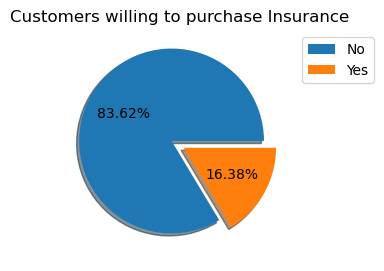

In [29]:
# Let's look at Response and how Customers feel about purchasing Vehicle Insurance

ax = df_train.Response.value_counts().plot(kind='pie', figsize=(10,3), 
                                        grid=False, ylabel='',
                                        labels = ['No', 'Yes'],
                                        shadow=True, explode=[0.1, 0.05],
                                        legend=True, labeldistance=None, 
                                        autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Customers willing to purchase Insurance')
plt.show()

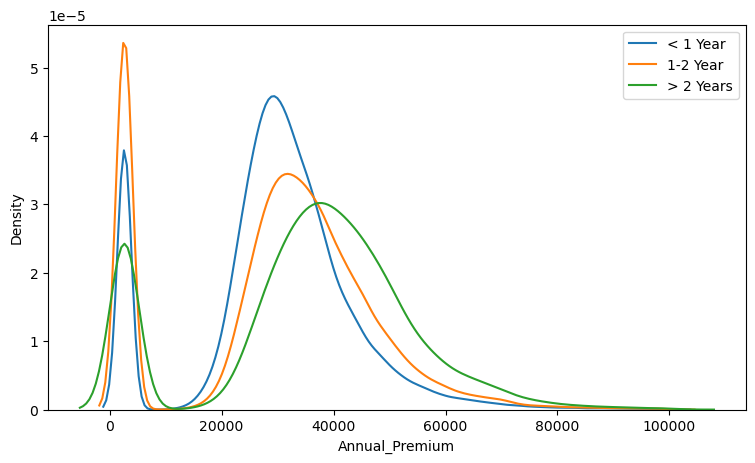

In [30]:
# Let's plot the KDE of Annual Premium based on vehicle age for premium below 100,000

f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(x_AP[x_AP.Vehicle_Age == '< 1 Year']["Annual_Premium"], ax = ax)
sns.kdeplot(x_AP[x_AP.Vehicle_Age == '1-2 Year']["Annual_Premium"], ax = ax)
sns.kdeplot(x_AP[x_AP.Vehicle_Age == '> 2 Years']["Annual_Premium"], ax = ax)
plt.legend(['< 1 Year', '1-2 Year', '> 2 Years'])
#plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

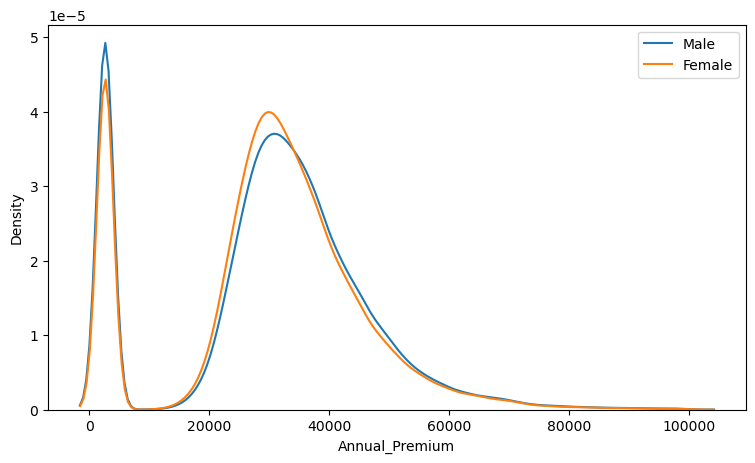

In [31]:
# Let's plot the KDE of Annual Premium based on Gender for premium below 100,000

f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(x_AP[x_AP.Gender == 'Male']["Annual_Premium"], ax = ax)
sns.kdeplot(x_AP[x_AP.Gender == 'Female']["Annual_Premium"], ax = ax)
plt.legend(['Male', 'Female'])
plt.show()

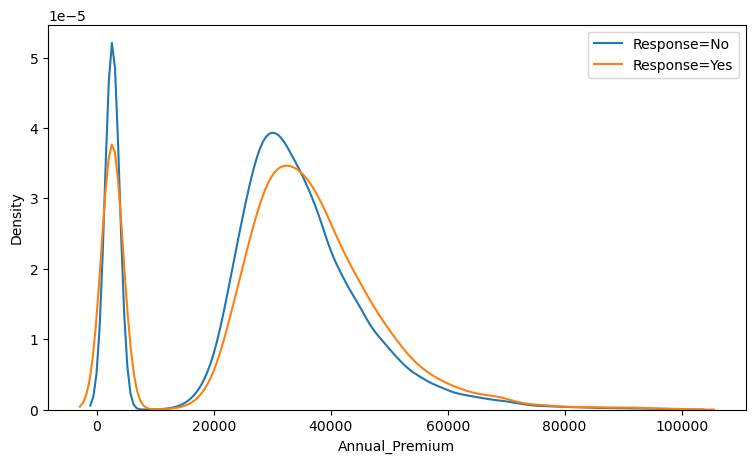

In [32]:
# Let's plot the KDE of Annual Premium based on Response for premium below 100,000

f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(x_AP[x_AP.Response == 0]["Annual_Premium"], ax = ax)
sns.kdeplot(x_AP[x_AP.Response == 1]["Annual_Premium"], ax = ax)
plt.legend(['Response=No', 'Response=Yes'])
plt.show()

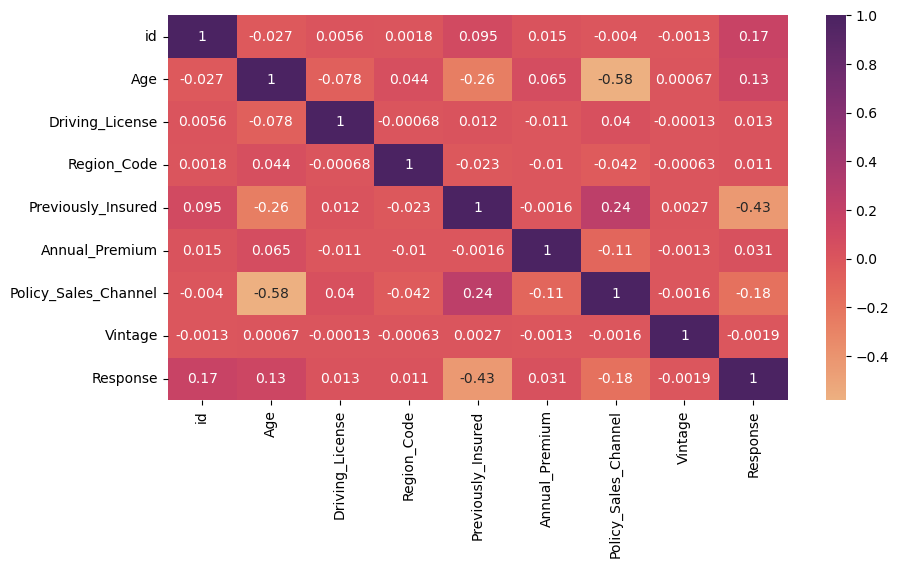

In [33]:
# Let's create a HeatMap to correlate numerical features

plt.figure(figsize=(10,5))
corr = df_train[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='flare');

In [34]:
# We know Annual Premium is skewed. Let's create a function to bin the values into a group
# We will convert the premium to a series of numbers. This will help us with better analysis
# For ex: 0-999 will be 1; 1,000 - 1,999 will be 2, .... until 99,000 - 99,999 will be 100
# all others values above 99,999 will be set to 999

def bin_annual_premium(row_val):
    if  row_val >= 100000:
        return 999
    else:
        x = int((row_val // 1000) + 1)
        return x

df_train['Premium_Bin'] = df_train['Annual_Premium'].apply(bin_annual_premium)
df_train[['Annual_Premium','Premium_Bin']]

,Annual_Premium,Premium_Bin
0,2630.0,3
1,43327.0,44
2,35841.0,36
3,27645.0,28
4,29023.0,30
...,...,...
382149,23938.0,24
382150,336395.0,999
382151,40443.0,41
382152,25380.0,26


In [35]:
df_train.Premium_Bin.unique()

array([  3,  44,  36,  28,  30,  56,  64,  48,  26,  41,  39,  34,  31,
        29,  27,  24,  46,  25,  33,  54,  42,  45,  67,  32,  66,  76,
        37,  53,  43,  38,  23,  22,  20,  21,  35,  17,  40,  80,  61,
        79,  75,  51,  70,  84,  59,  58,  49,  47,  50,  55,  60,  52,
        73,  77,  63,  19,  57,  18,  69,  91,  78,  92,  15,  65, 100,
        62,  74,  68,  72, 999,  16,  87,  81,  88,  71,  85,  82,  14,
        86,  95,  90,  83,  98,  12,  13,   7,  89,  96,  99,  93,  97,
        94,  11,  10,   8])

In [36]:
# We need to apply the same steps for test data as well
df_test['Premium_Bin'] = df_test['Annual_Premium'].apply(bin_annual_premium)

In [37]:
# now let's drop Annual_Premium from the dataframe for simpler analysis
df_train.drop('Annual_Premium', axis='columns', inplace=True)

In [38]:
# Similarly drop Annual_Preimum from df_test dataset as well
df_test.drop('Annual_Premium', axis='columns', inplace=True)

In [39]:
# We need to remove 'Annual_Premium' from the numerical_features list
# We need to add Premium_Bin instead to the numerical_features list
numerical_features.remove('Annual_Premium')
numerical_features.append('Premium_Bin')

In [40]:
# Let's perform some transformation on categorical features
# import label encoder

# make an instance of Label Encoder
label_encoder = LabelEncoder()

# transform 'Gender' from Object to Numeric using fit_transform
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

# transform 'Vehicle_Age' from Object to Numeric using fit_transform
df_train['Vehicle_Age'] = label_encoder.fit_transform(df_train['Vehicle_Age'])

# transform 'Vehicle_Damage' from Object to Numeric using fit_transform
df_train['Vehicle_Damage'] = label_encoder.fit_transform(df_train['Vehicle_Damage'])

# Let's look at the top 10 rows to see how the transformation helped
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Premium_Bin
0,167647,1,22,1,7.0,1,1,0,152.0,16,0,3
1,17163,1,42,1,28.0,0,0,1,26.0,135,0,44
2,32023,0,66,1,33.0,0,0,1,124.0,253,0,36
3,87447,0,22,1,33.0,0,1,0,152.0,69,0,28
4,501933,1,28,1,46.0,1,1,0,152.0,211,0,30


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  int64  
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  int64  
 7   Vehicle_Damage        382154 non-null  int64  
 8   Policy_Sales_Channel  382154 non-null  float64
 9   Vintage               382154 non-null  int64  
 10  Response              382154 non-null  int64  
 11  Premium_Bin           382154 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 35.0 MB


In [42]:
# Similarly do the same for df_test dataframe as well

# transform 'Gender' from Object to Numeric using fit_transform
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])

# transform 'Vehicle_Age' from Object to Numeric using fit_transform
df_test['Vehicle_Age'] = label_encoder.fit_transform(df_test['Vehicle_Age'])

# transform 'Vehicle_Damage' from Object to Numeric using fit_transform
df_test['Vehicle_Damage'] = label_encoder.fit_transform(df_test['Vehicle_Damage'])

In [43]:
# Let's reset the values in numerical_features based on new changes we made
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)
numerical_features

The numerical features in the Insurance Dataset are:
['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage', 'Response', 'Premium_Bin']


['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 'Vintage',
 'Response',
 'Premium_Bin']

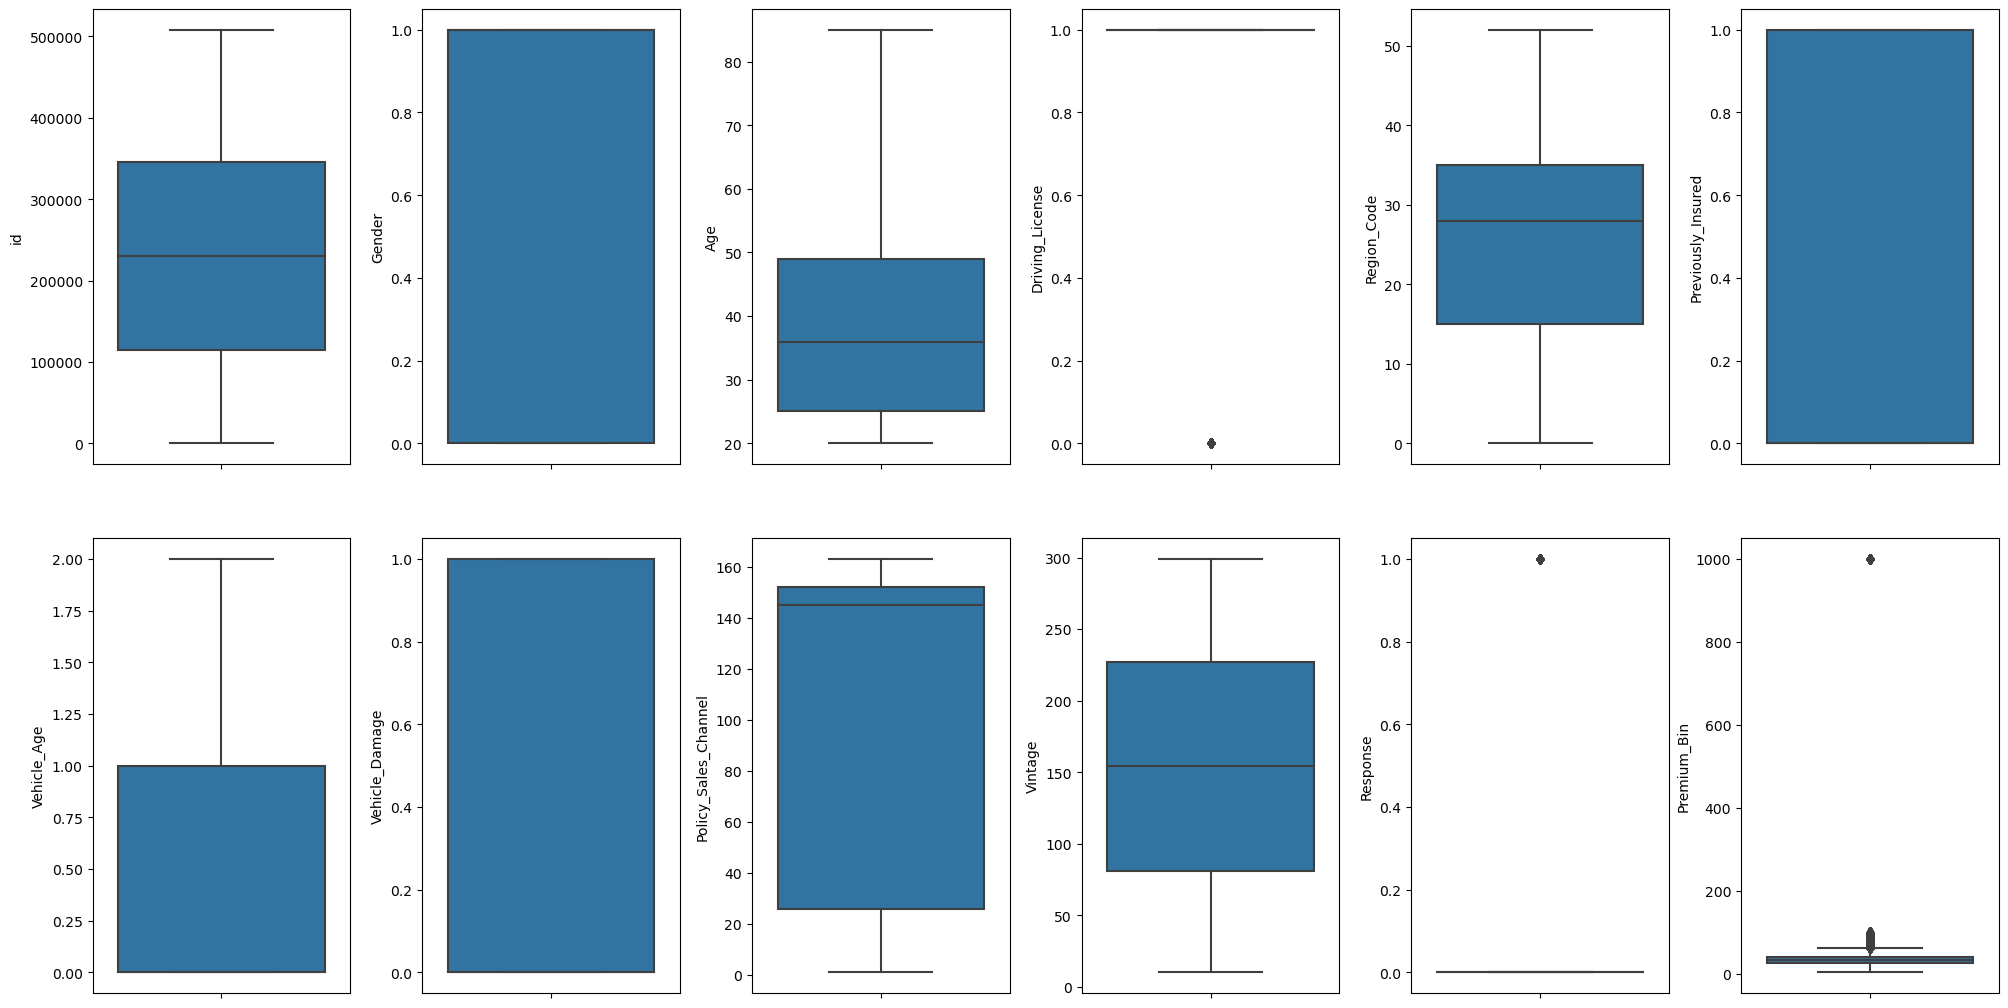

In [44]:
# We now have all the columns as numeric. So we can plot a boxplot on all columns.
# We have 12 columns. So let's split them into two rows of 6 columns to display the boxplot

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_train.items():
    sns.boxplot(y=k, data=df_train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

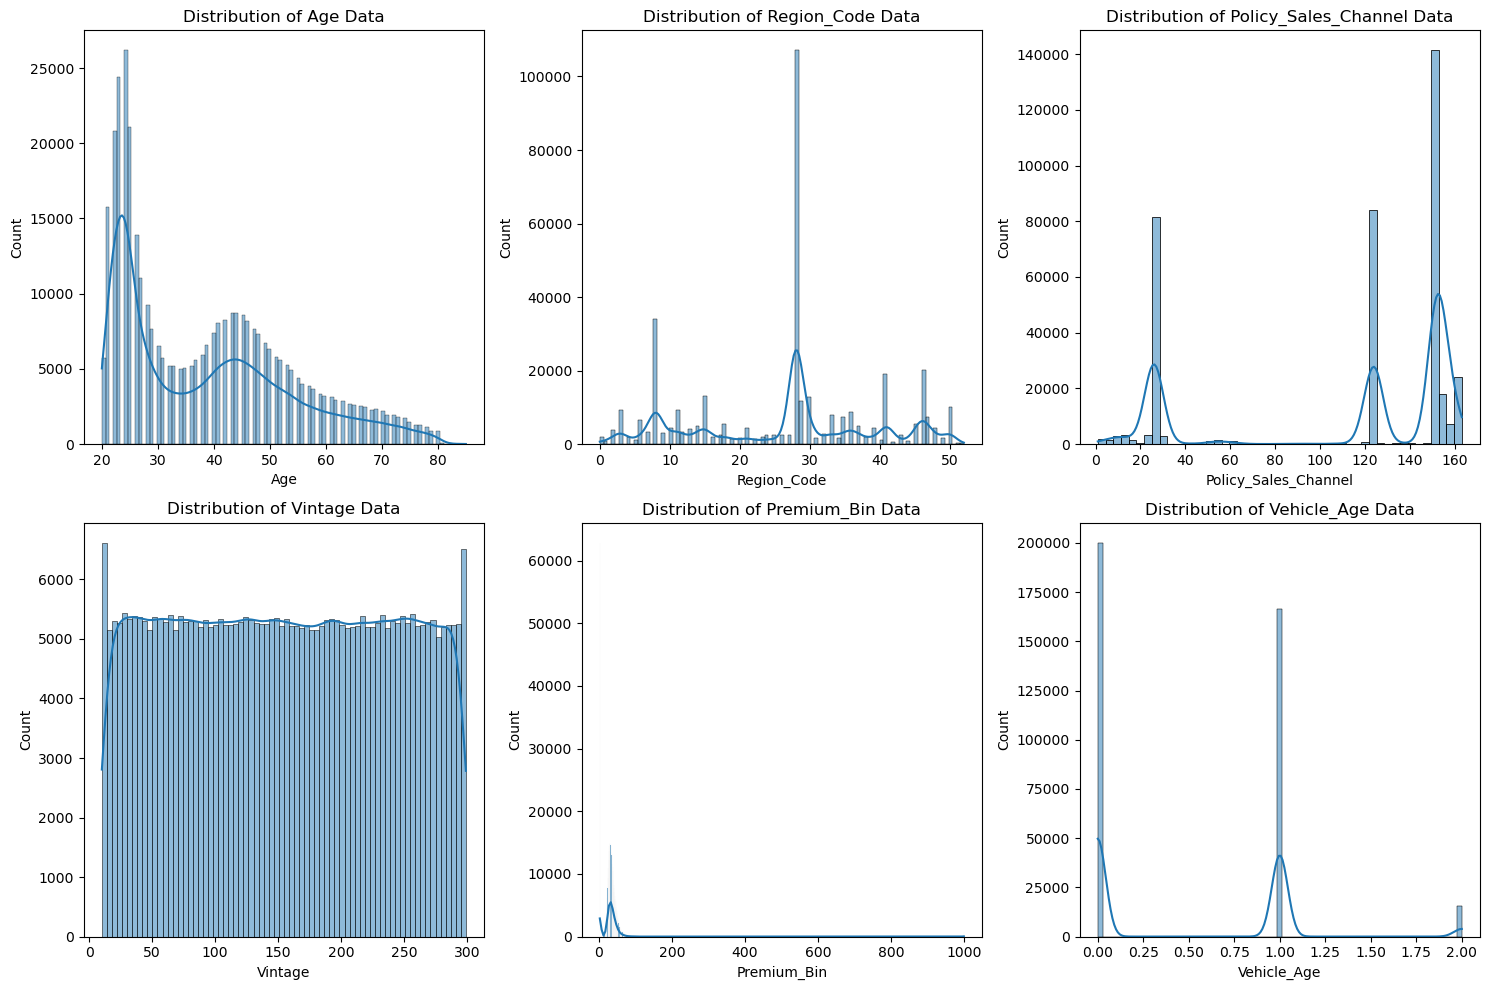

In [45]:
# Let's also plot the distribution grap and look at the skewness of the feature 
# using the Kernel Density Estimate (kde)

# We already know that some columns are not really skewed as they have very few values. 
# Let's exclude them from KDE analysis

# Columns being excluded are: 
# Id (each row is unique so it does not make sense to do distribution), 
# Gender (only two values, so no real distribution), 
# Driving License. It is either 0 or 1,
# Previously Insured. It is either 0 or 1
# Vehicle Damage. It is either 0 or 1
# Response. It is either 0 or 1

# This leaves us with only 5 columns. So we can plot these 3 in one row
# We have 4 features. Let's plot them on a 3x2 subplot

# Columns being plotted are:
# Age, Region_Code, Policy_Sales_Channel, Premium_Bin, Vehicle_Age, and Vintage

col_list = ['Age', 'Region_Code', 'Policy_Sales_Channel', 
            'Vintage', 'Premium_Bin','Vehicle_Age']

plt.figure(figsize=(15,10))
for i,col in enumerate(col_list,1):
    plt.subplot(2,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_train[col],kde=True)
    plt.tight_layout()
    plt.plot()

The only meaningful data from the above KDE graph is that we can see good distribution for columns\
`'Age'`, `'Region_Code'`, and `'Policy_Sales_Channel'`
Distribution for `Premium_Bin` is not clearly visible as the distribution is still skewed right

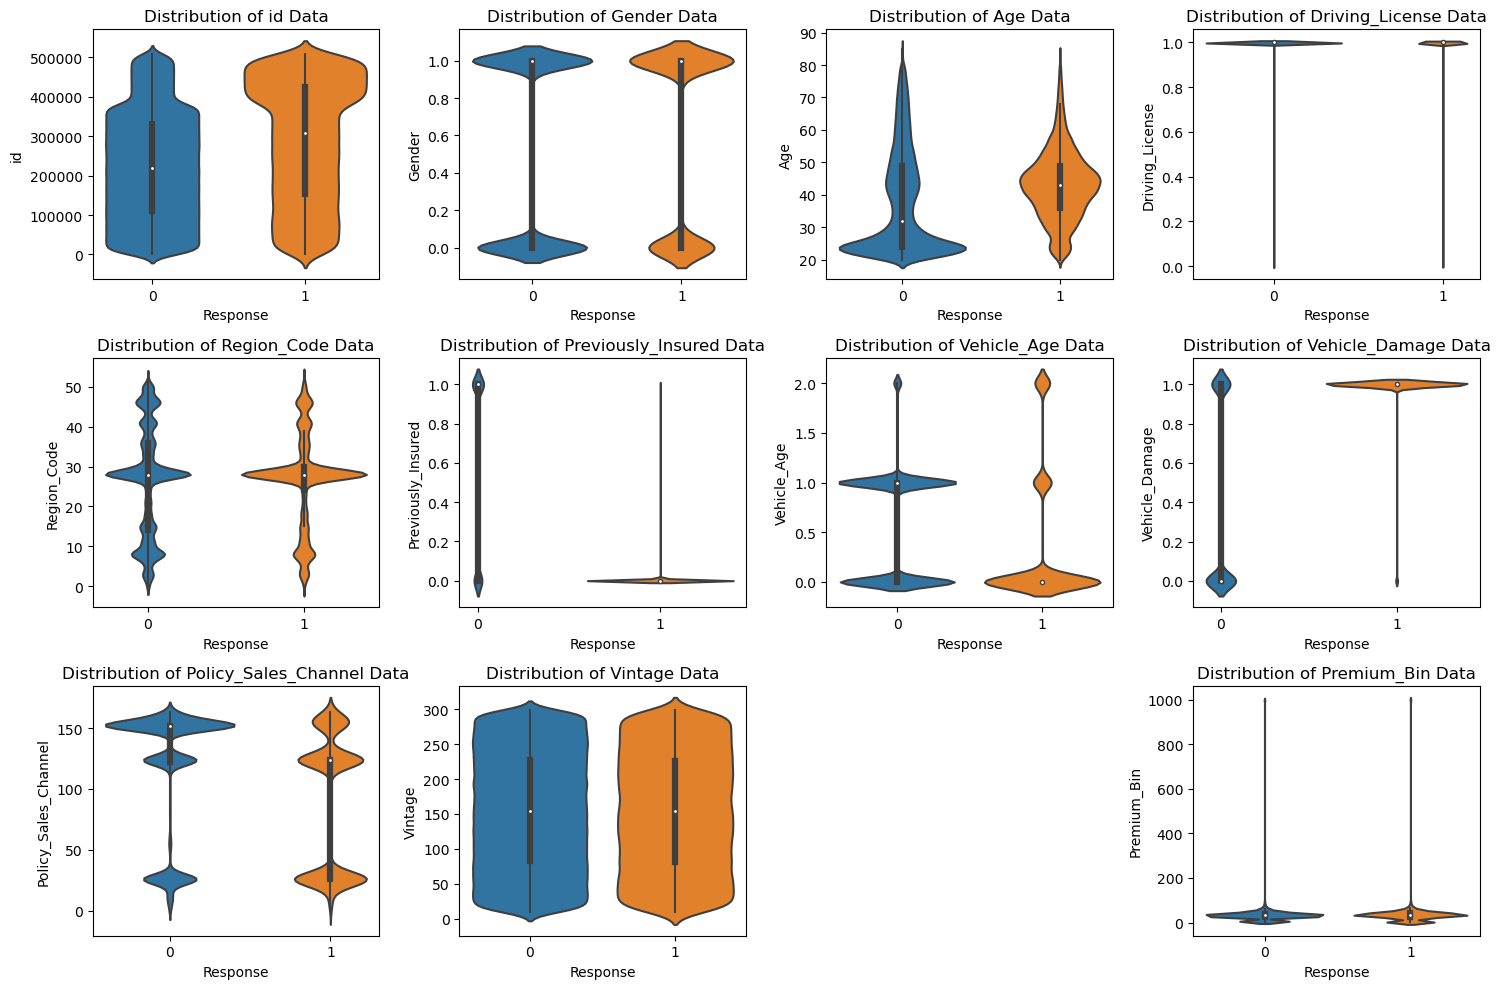

In [46]:
# We know that some features are contributing to the decision whether the customer will
# purchase vehicle insurance or now.
# Let's plot a Violin plot to see the data in comparison with 'Response' column
# We have 12 attributes with 1 attribute as 'Response'. 
# Let's plot the violin graph excluding the 'Response' column
# Plotting in a 3x4 matrix

plt.figure(figsize=(15,10))
for i,col in enumerate(df_train.columns,1):
    if col=='Response': continue
    plt.subplot(3,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.violinplot(data=df_train, x='Response', y=df_train[col])
    plt.tight_layout()
    plt.plot()

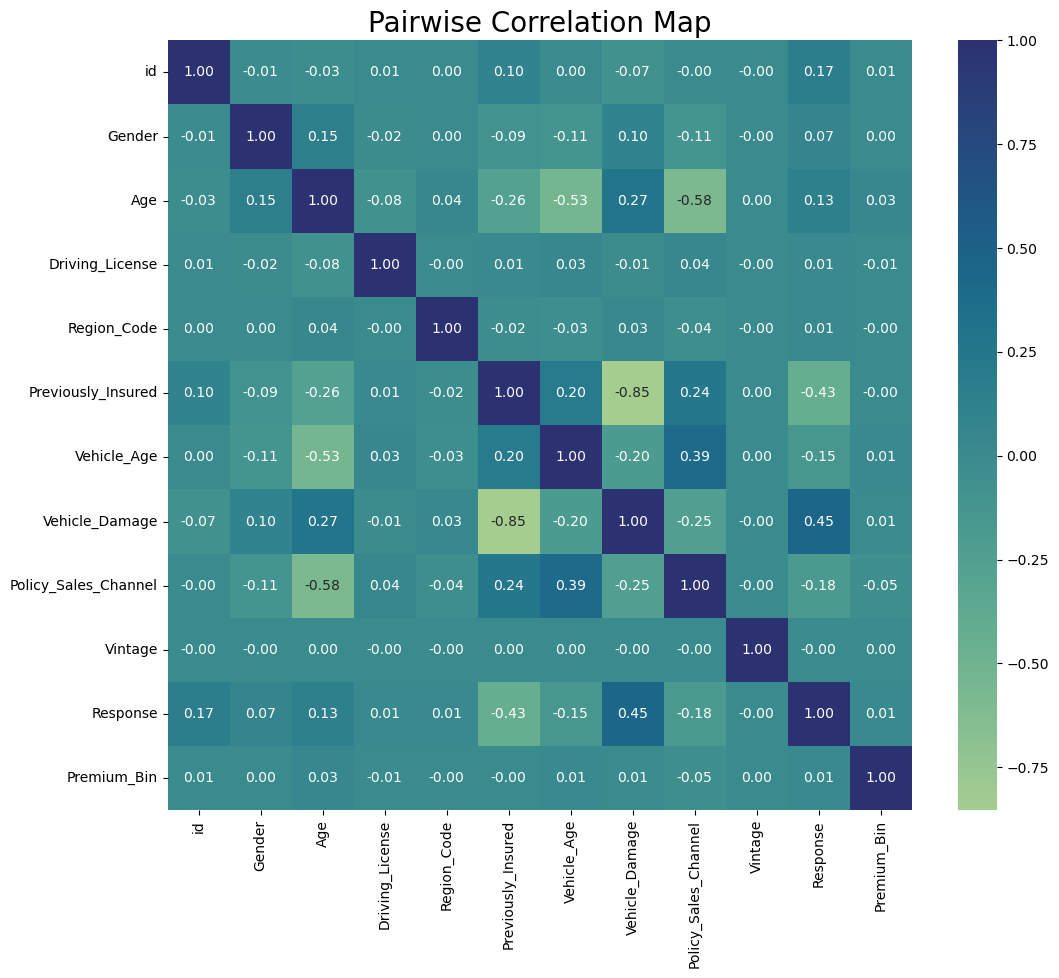

In [47]:
# Having analyzed all the data, let's revisit the pairwise correlation mapping 

plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f', cmap='crest')
plt.title('Pairwise Correlation Map', size = 20)
plt.show()

In [48]:
# There are 53 Region Codes. Let's review the relationship between Region Code and Response

# Explore relationship between Region Code and Response

region_unique = sorted(df_train.Region_Code.unique())
region_unique = np.array(region_unique, dtype=int)
# region_unique has the 53 unique region codes

region_response_values=df_train.groupby('Region_Code')['Response'].count().values
mean_resp=[]
for i,region in enumerate(region_unique):
    mean_resp.append(sum(df_train[df_train['Region_Code']==region].Response)/region_response_values[i])

mc = df_train.groupby('Region_Code')['Response'].mean()

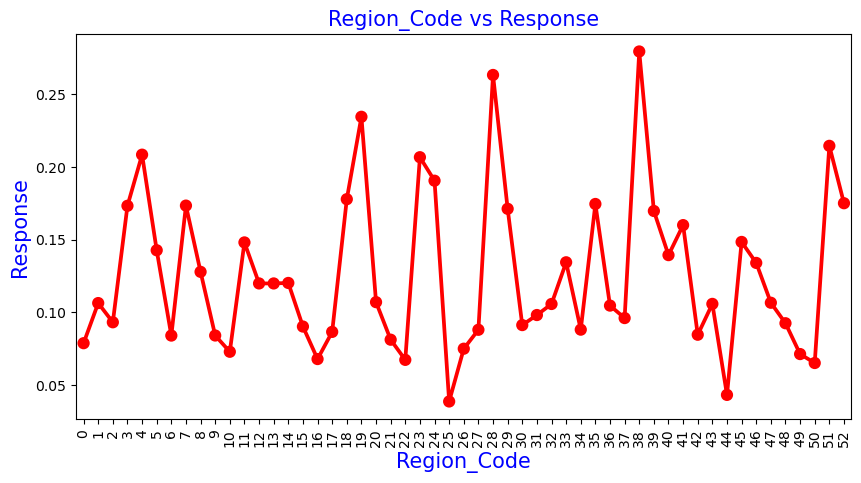

In [49]:
plt.figure(figsize=(10,5))
sns.pointplot(x=region_unique,y=mean_resp,color='red') #,alpha=0.8
plt.xlabel('Region_Code',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('Response',fontsize = 15,color='blue')
plt.title('Region_Code vs Response',fontsize = 15,color='blue')
plt.show()

The above graph shows that there are some regions where Response = 1 (Customers willing to take Vehicle Insurance) is higher. Howver, there are regions where customers are not interested in the Vehicle Insurance. Examples are: Region 25 and 44. 

In [50]:
# Let's explore Region_Code 25 and 
# see how many in this region are interested in the Vehicle Insurance

df_train[(df_train['Region_Code'] == 25.0) & (df_train['Response'] == 1)]['Response'].count()

96

In [51]:
# Let's also see how many are NOT interested in the Vehicle Insurance
df_train[(df_train['Region_Code'] == 25.0) & (df_train['Response'] == 0)]['Response'].count()

2375

We find that there are 96 interested in the Vehicle Insurance and 2375 NOT interested in the Vehicle Insurance

- We have a total of 96 + 2375 = 2471 individuals in Region 25.0
- We have 96 / 2471 = 4% (0.039) interested in the Vehicle Insurance.
- We have 2375 / 2471 = 96% (0.961) NOT interested in the Vehicle Insurance

In [52]:
# Let's also explore Region_Code 38 and 
# see how many in this region are interested in the Vehicle Insurance

df_train[(df_train['Region_Code'] == 38.0) & (df_train['Response'] == 1)]['Response'].count()

562

In [53]:
# Let's also see how many are NOT interested in the Vehicle Insurance
df_train[(df_train['Region_Code'] == 38.0) & (df_train['Response'] == 0)]['Response'].count()

1452

For Region 38, we have: 
- 562 (28%) intersted in the Vehichle Insuarnce and 
- 1452 (72%) NOT interested in the Vehicle Insuarance offer

## Machine Learning Models 

- ### K Means
- ### K-nearest neighbors (KNN) 
- ### Linear Regression
- ### Logistic Regression
- ### Decision Tree Classifier
- ### Random Forest Classifier
- ### Randomized Search CV
- ### Extra Tree Classifer
- ### Gaussian Naive Bayes 

#### Define a placeholder to capture the following key details:
- Model Name
- `Accuracy Score` : accuracy_score(y_true, y_pred_class)
- `ROC AUC       ` : roc_auc_score(y_true, y_pred_pos)
- `F1 Score      ` : f1_score(y_true, y_pred_class)

In [54]:
# Define the variables to capture the values for each model run

models = []
accuracy_values = []
roc_auc_values = []
f1_score_values = []

## K Means exploration

### Things we can eliminate from the data for our analysis:

- `id`: We know that `id` is not a very useful data. We can exclude this from the analysis
- `Response`: We need to predict for `Response` so we need to separate this out

In [55]:
scaler = StandardScaler()

X = df_train.drop(['id','Response'], axis=1)
x = np.array(scaler.fit_transform(X))
y = np.array(df_train['Response']).reshape(-1,1)

# Let's to a test train split at 80% train and 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

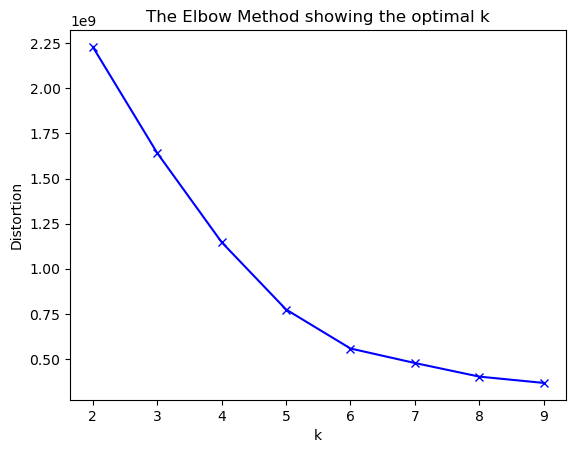

In [56]:
distortions = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Observation

From the above plot, we can conclude that k=6 is optimal.

### Building a KMeans model with k=6

Now we have to build a K-means model with k=6

In [57]:
# Rerun the model with k=6

km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e9, random_state=0).fit(X_train)

In [58]:
y_km = km.predict(X_test)

In [59]:
print(y_km)

[1 5 1 ... 1 5 0]


In [60]:
y_km.shape

(76431,)

In [61]:
X.shape

(382154, 10)

In [62]:
print(km.cluster_centers_)

[[6.11886007e-01 5.09578416e+01 9.95551252e-01 2.71475676e+01
  3.33132704e-01 2.28901159e-01 6.45094601e-01 2.52308900e+01
  2.31571272e+02 3.78813754e+01]
 [5.03841908e-01 3.31204952e+01 9.99199152e-01 2.57331659e+01
  5.62087401e-01 6.48535746e-01 4.05250969e-01 1.44906452e+02
  2.38943681e+02 2.95133114e+01]
 [4.90125891e-01 3.02096043e+01 9.99654147e-01 2.50544373e+01
  5.95369025e-01 7.27692467e-01 3.71757626e-01 1.48185533e+02
  1.11273189e+02 2.87896002e+01]
 [5.24660805e-01 3.56875910e+01 9.99010074e-01 2.68019760e+01
  5.21846309e-01 5.78990275e-01 4.47427163e-01 1.32902929e+02
  3.79568120e+01 2.97851278e+01]
 [5.78385565e-01 4.52406838e+01 9.97075024e-01 2.90487749e+01
  4.03722697e-01 3.31623932e-01 5.67065527e-01 1.31444027e+02
  1.54927293e+02 5.31942640e+01]
 [6.10051729e-01 5.05739933e+01 9.95258140e-01 2.71303885e+01
  3.33629171e-01 2.26747135e-01 6.40480779e-01 2.50637489e+01
  9.58970484e+01 3.28809717e+01]]


In [63]:
#Getting unique labels

u_labels = np.unique(y_km)
u_labels

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [64]:
accuracy = accuracy_score(y_test, y_km)
print (accuracy)

0.12819405738509243


## Explore KNN algorithms
KNN is a supervised classification algorithm that classifies new data points based on the nearest data points. On the other hand, K-means clustering is an unsupervised clustering algorithm that groups data into a K number of clusters

Reference: https://learn.g2.com/k-nearest-neighbor

In [65]:
scaler = StandardScaler()
X = df_train.drop(['id','Response'], axis=1)
x = np.array(scaler.fit_transform(X))
y = np.array(df_train['Response']).reshape(-1,1)

In [66]:
print(np.mean(x), np.std(x))

3.642574128826631e-17 1.0000000000000002


In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

### Building Different models 

To find a optimal numbe rof neighbors, we will build different models with different vlaues for neighbors and then plot K vs the accuracy. 

In [68]:
k_range = range(1, 10)
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, np.ravel(y_train))
    y_pred = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))

0.8120919522183407
0.8312595674529968
0.8244429616255184
0.8323062631654695
0.8291661760280514
0.8339940600018317
0.8318745011840746
0.8350015046250867
0.8333922099671599


Text(0, 0.5, 'Test Accuracy')

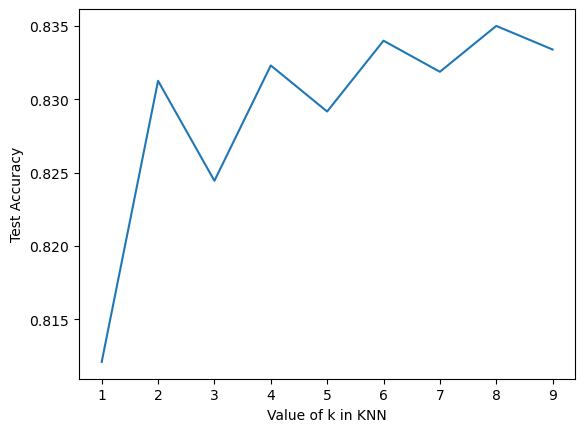

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
for v in scores_list: print (v)
plt.plot(k_range, scores_list)
plt.xlabel("Value of k in KNN")
plt.ylabel("Test Accuracy")

##### Observations from K vs Accuracy plot

From the above plot, we can observe that for most part as K increases, the accuracy icnreases. 
When 

For K=2, K=4, and K=6 the accuracy is between 83% and 83.5% 

For K=3 and K=5, accuracy dips below to 82.4% and 83% after going up by 0.5%

For K=8, the accuracy goes to the max value of 83.5%, which is only 0.5% more than when K=2.

Since KNN is computationally expensive, we will consider K=2 as an optimal value.

### Building a KNN model with K=2

In [70]:
# from the above plot, we can say that k=2 gives the best accuracy
# then we build a model with 2 neighbors

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)

In [71]:
print('The Test Accuracy of the data is {}%'.format(
    round(accuracy_score(y_test, y_pred),2)*100))

The Test Accuracy of the data is 83.0%


#### Let's build the Confusion Matrix for KNN model with K=2

In [72]:
#let us get the predictions using the classifier we had fit above
cm = confusion_matrix(y_test, y_pred)
print(cm)
y_pred_1d = y_pred.flatten()
y_test_1d = y_test.flatten()
pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

[[60966  2823]
 [10074  2568]]


Predicted,0,1,All
True,,,
0,60966,2823,63789
1,10074,2568,12642
All,71040,5391,76431


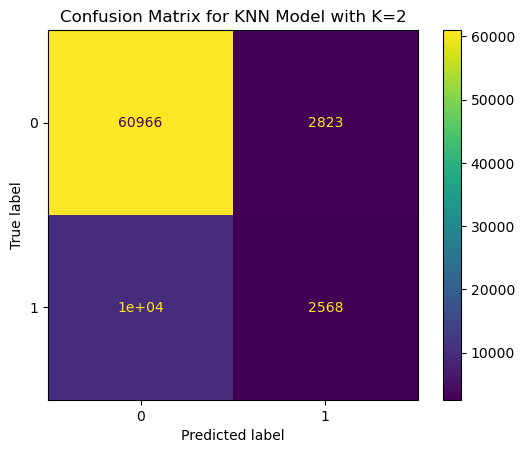

In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for KNN Model with K=2')
plt.show()

In [74]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

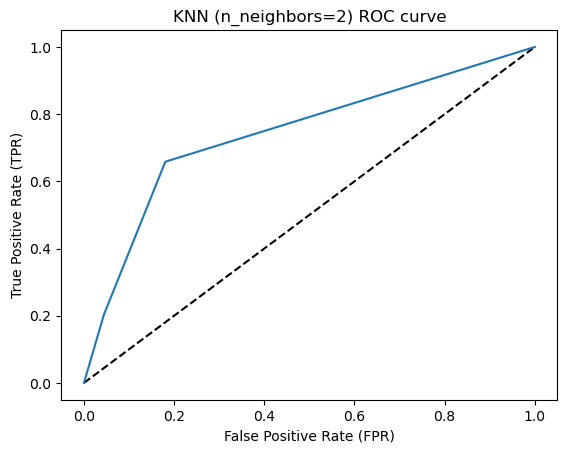

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('KNN (n_neighbors=2) ROC curve')
plt.show()

In [76]:
# Area under ROC curve
knn_roc_auc = roc_auc_score(y_test, y_pred_proba)

print ('The KNN ROC Accuracy Score is {}'.format(round(knn_roc_auc,2)))

The KNN ROC Accuracy Score is 0.74


In [77]:
# Print the Accuracy, ROC AUC and F1 Score for K-nearest Neighbor 

#knn_accuracy = accuracy_score(y_test, y_pred_proba)
knn_roc_auc = roc_auc_score(y_test, y_pred_proba)
#knn_f1_score = f1_score(y_test, y_pred_proba)

print('Results for K-nearest Neighbor')
#print(f'Accuracy is: {knn_accuracy:.2f}')
print(f'ROC AUC is : {knn_roc_auc:.2f}')
#print(f'F1 Score is : {knn_f1_score:.2f}')

models.append('K-nearest Neighbor')
accuracy_values.append('N/A')
roc_auc_values.append(knn_roc_auc)
f1_score_values.append('N/A')

Results for K-nearest Neighbor
ROC AUC is : 0.74


## Linear Regression

### Multilinear Regression

In a multilinear regression, instead of one independent variable, we will consider more than one independent variable to find a linear relationship between independent variables and dependent variable.

In our project, we have a few independent variables that maybe of interest to us.

We will consider 10 independent variables to find a linear relationship between them and our target variable, `Response`. The Independent variables we will use are:

`'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage','Premium_Bin'`

Later we will trim this down to compare and see if we get better results with fewer independent variables

#### Explanation

x = all independent variables that we are considering for our study

y = Response

Goal: Get a linear relationship between y and x.

#### Check for Normal Distribution

Let's check if the data is normally distribution. We know that many of the independent variables are NOT normally distributed. We will have to address them and transform them to normal distribution

#### We will do a Shapiro-Wilks  Test and Normal Test
The null hypothesis (H0) states that the variable is normally distributed, and the alternative hypothesis (H1) states that the variable is NOT normally distributed.

In [78]:
ind_vars = ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 
            'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage','Premium_Bin']

In [79]:
from scipy import stats

for iv in ind_vars:
    shapiro_x = stats.shapiro(df_train[iv])
    print('Column :', iv)
    print(shapiro_x)

Column : Gender
ShapiroResult(statistic=0.6366690397262573, pvalue=0.0)
Column : Age
ShapiroResult(statistic=0.9109907150268555, pvalue=0.0)
Column : Driving_License
ShapiroResult(statistic=0.019281983375549316, pvalue=0.0)
Column : Region_Code
ShapiroResult(statistic=0.9409986734390259, pvalue=0.0)
Column : Previously_Insured
ShapiroResult(statistic=0.6385384798049927, pvalue=0.0)
Column : Vehicle_Age
ShapiroResult(statistic=0.7123912572860718, pvalue=0.0)
Column : Vehicle_Damage
ShapiroResult(statistic=0.6341382265090942, pvalue=0.0)
Column : Policy_Sales_Channel
ShapiroResult(statistic=0.7159302830696106, pvalue=0.0)
Column : Vintage
ShapiroResult(statistic=0.9546786546707153, pvalue=0.0)
Column : Premium_Bin
ShapiroResult(statistic=0.21187371015548706, pvalue=0.0)


#### Conclusion from Shario-Wilk test

Since our data size is too large, the pvalue is not clearly shown. We already know that the two of the columns are NOT normally distributed 'Vintage' and 'Preimum_Bin'. So let's explore ways to normally distribute them.

#### Box-cox Transformation

The Box-Cox transformation is defined as:

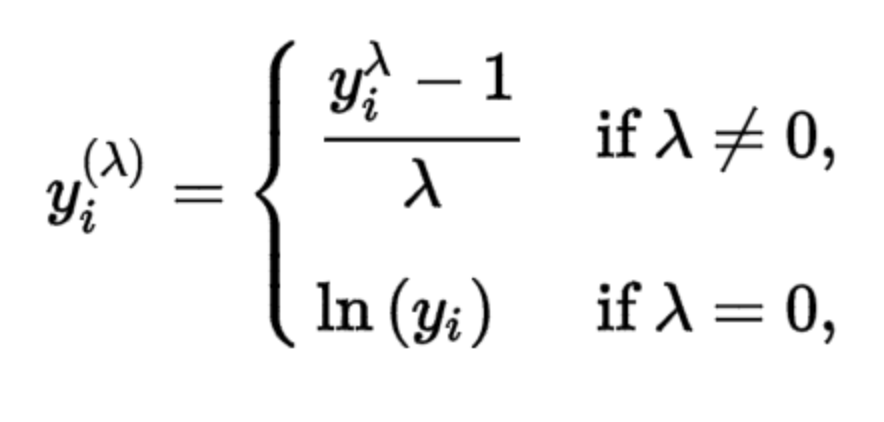

where y is the response variable and λ is the transformation parameter. λ value varies from -5 to 5. During the transformation, all values of λ are considered and the optimal/best value for the variable is selected. log(y) is only applied when λ=0.

Reference: https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/

In [80]:
norm_vars = ['Vintage','Premium_Bin']

Lambda value used for Transformation for Vintage : 0.7256515915862556
Lambda value used for Transformation for Premium_Bin : 0.34801854955192096


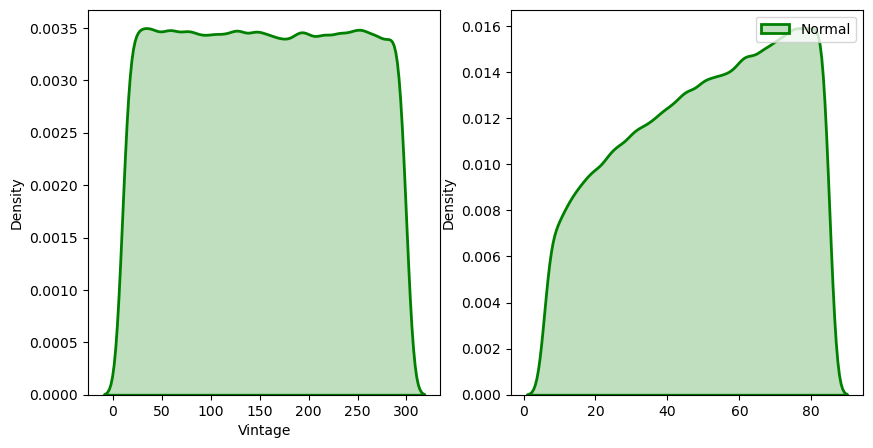

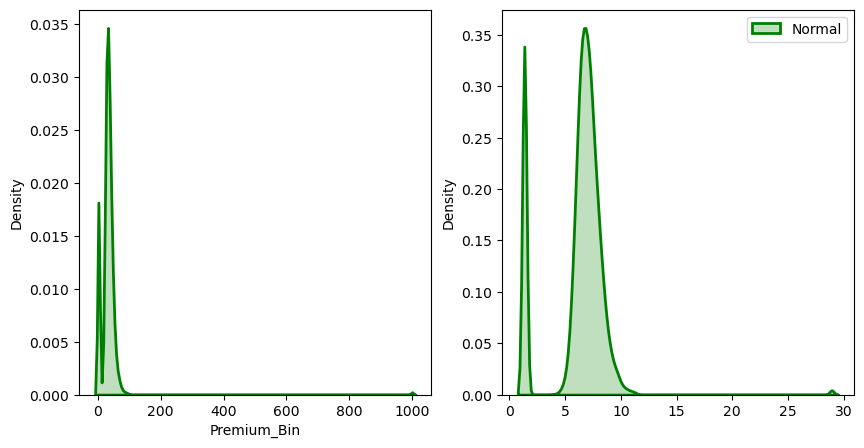

In [81]:
for iv in norm_vars:
    original_data = df_train[iv]

    fitted_data, fitted_lambda = stats.boxcox(original_data)
    fig, ax = plt.subplots(1, 2)

    sns.distplot(original_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="green", ax = ax[0])

    sns.distplot(fitted_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Normal", color ="green", ax = ax[1])

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)

    print(f"Lambda value used for Transformation for {iv} : {fitted_lambda}")
    iv_x = iv + '_norm'
    df_train[iv_x] = fitted_data

The above two independent variables are normally distributed. We will use these two independent variables instead of the original ones

In [82]:
ind_varx = ['Gender', 'Age', 'Driving_License', 'Region_Code', 
            'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 
            'Policy_Sales_Channel', 'Vintage_norm','Premium_Bin_norm']

In [83]:
LReg = linear_model.LinearRegression() # creating an instance of Linear Regression class
a_scaler = StandardScaler() # creating an instance of Standard Scaler

In [84]:
lr = a_scaler.fit_transform(df_train[ind_varx])

In [85]:
# Let's split the data 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(lr, df_train['Response'], 
                                                    test_size=0.2, random_state=42)

# Let's run the Linear Regression on the training data
LReg.fit(X_train, y_train)

LinearRegression()

In [86]:
# y = mx + b here m is the coefficient (or slope) of x 
# and b is the intercept

print(LReg.coef_) # 
print(LReg.intercept_)

[ 0.00596915 -0.02901348  0.00722346 -0.00063655 -0.06369811 -0.02397999
  0.1059375  -0.03335745 -0.00043033  0.00919335]
0.16354580794840262


In [87]:
# yhat stands for perdicted value of y and for this we 
# have to use the x_test values

yhat = LReg.predict(X_test)

In [88]:
mse_test = mean_squared_error(y_test, yhat)
print(mse_test)

0.10738469671512424


In [89]:
# y_t_predict is the predicted y values for the x_train data
y_t_predict = LReg.predict(X_train)

# note that y_train is the true y value
mse_train = mean_squared_error(y_train, y_t_predict)
print(mse_train)

0.10658256814996193


In [90]:
# Since MSE has no upper bound, we compute the ratio between 
# mse_test and mse_train or difference to see if 
# ratio is close to one and difference is less than 5%

r1 = round(mse_test/mse_train, 4)

diff1 = round(np.abs(mse_train - mse_test),4)
diff2 = round(np.abs((mse_train - mse_test) / mse_train),4)

print('The ratio of MSE Test and MSE Train is',r1)

print('The difference between MSE Train and MSE Test is',diff1)

print('The ratio between the difference between MSE Train and MSE Test is',diff2)

The ratio of MSE Test and MSE Train is 1.0075
The difference between MSE Train and MSE Test is 0.0008
The ratio between the difference between MSE Train and MSE Test is 0.0075


##### Observation: 
- The MSE Test and MSE Train difference is close to 1
- Ratio of the difference is less than 5%

In [91]:
print("r-squared for the test data: ", round(r2_score(y_test, yhat),4))
    
print("r-squared for the train data: ", round(r2_score(y_train, y_t_predict),4))

r-squared for the test data:  0.2221
r-squared for the train data:  0.2204


In [92]:
# Print the Accuracy, ROC AUC and F1 Score for Linear Regression

lreg_roc_auc = roc_auc_score(y_test, yhat)

print('Results for Linear Regression')
print(f'ROC AUC is : {lreg_roc_auc:.2f}')

models.append('Linear Regression') 
accuracy_values.append('N/A')
roc_auc_values.append(lreg_roc_auc)
f1_score_values.append('N/A')

Results for Linear Regression
ROC AUC is : 0.85


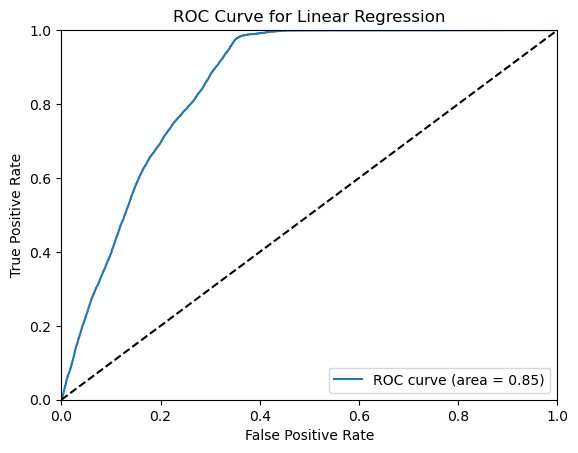

In [93]:
fpr, tpr, threshold = roc_curve(y_test, yhat)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %lreg_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear Regression')
plt.legend(loc="lower right")
plt.show()

R-squared is a measure of how well a linear regression model “fits” a dataset. Also commonly called the coefficient of determination, R-squared is the proportion of the variance in the response variable that can be explained by the predictor variable.

The value for R-squared can range from 0 to 1. A value of 0 indicates that the response variable cannot be explained by the predictor variable at all. A value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable.

Conclusion: 
Since the R-Squared value is very low (close to 0), we cannot use the **Linear Regression model** to do the prediction.

## Logistic Regression

We have normalized all the data. All columns are now numeric. We will use StandardScalar to perform Logistic Regression.

In [94]:
# we are creating an instance of StandardScaler class and then performing a fit on x_train to obtain 
# mean and standard deviation for x-train
# then use it to transorm both x_train and x_test

x = df_train[ind_varx]
y = df_train['Response']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(x_train) # mean and standard deviation for x-train

train_sc = scaler.transform(x_train) 

test_sc = scaler.transform(x_test)

In [95]:
model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

model.fit(train_sc, y_train)

ypred = model.predict(test_sc)

cm = confusion_matrix(y_test, ypred)

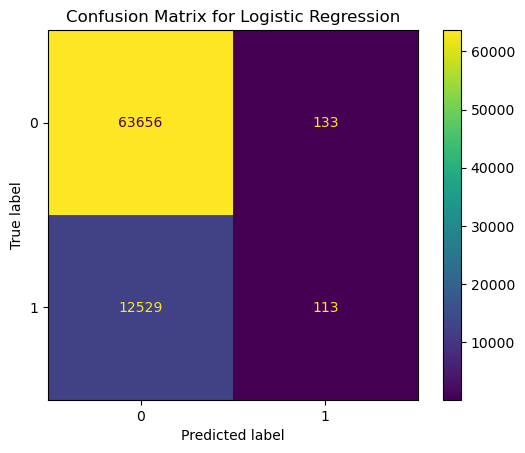

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [97]:
# Print the ROC AUC and Accuracy Percentage for Logistic Regression

print(classification_report(y_test, ypred))


logit_accuracy = accuracy_score(y_test, ypred)
logit_roc_auc = roc_auc_score(y_test, ypred)
logit_f1_score = f1_score(y_test, ypred)

print('Results for Logistic Regression')
print(f'Accuracy is: {logit_accuracy:.2f}')
print(f'ROC AUC is : {logit_roc_auc:.2f}')
print(f'F1 Score is : {logit_f1_score:.2f}')

models.append('Logistic Regression') 
accuracy_values.append(logit_accuracy)
roc_auc_values.append(logit_roc_auc)
f1_score_values.append(logit_f1_score)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     63789
           1       0.46      0.01      0.02     12642

    accuracy                           0.83     76431
   macro avg       0.65      0.50      0.46     76431
weighted avg       0.77      0.83      0.76     76431

Results for Logistic Regression
Accuracy is: 0.83
ROC AUC is : 0.50
F1 Score is : 0.02


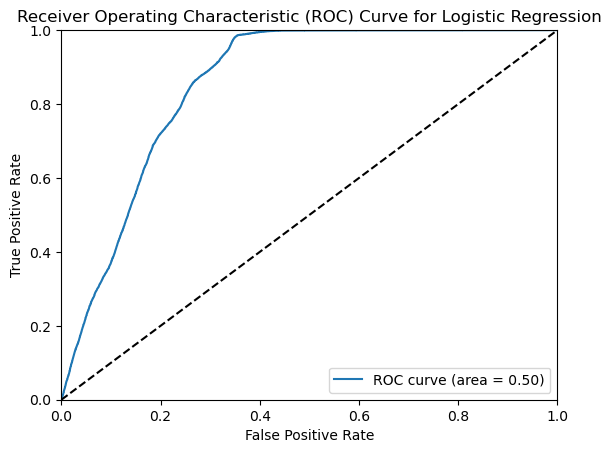

In [98]:
b = model.predict_proba(test_sc)[:,1]
fpr, tpr, threshold = roc_curve(y_test, b)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

From our test, the Logistic ROC Curve score is 0.50. Our number is below the acceptable ratio. So we cannot use Logistic Regression to determine the acceptance of Vehicle Insurance.

In general, an AUC of 0.5 suggests no discrimination (i.e., in the case of customers willing to purchase Vehicle Insurance, the results with a value of 0.5 suggests no discrimination in the ability to determine either willing to purchase or not based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

Reference: https://www.sciencedirect.com/science/article/pii/S1556086415306043

## Decision Tree Classifier
We will now explore Decision Tree Classifier model to see if this can help us get better results.

In [99]:
x = df_train[ind_varx]
y = df_train['Response']

xdr_train, xdr_test, ydr_train, ydr_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Create the Model

dtree = DecisionTreeClassifier()

# Fit the Model (train the model)
dtree.fit(xdr_train,ydr_train)   

DecisionTreeClassifier()

In [100]:
# Test the model and predict the results

dtree_predict=dtree.predict(xdr_test)

In [101]:
# Publish the Classification Report based on the Test Results

print(classification_report(ydr_test, dtree_predict))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     63789
           1       0.43      0.44      0.44     12642

    accuracy                           0.81     76431
   macro avg       0.66      0.66      0.66     76431
weighted avg       0.81      0.81      0.81     76431



In [102]:
# Print the ROC AUC and Accuracy Percentage for Gaussian Naive Bayes

dtree_accuracy = accuracy_score(ydr_test, dtree_predict)
dtree_roc_auc = roc_auc_score(ydr_test, dtree_predict)
dtree_f1_score = f1_score(ydr_test, dtree_predict)

print('Results for Decision Tree Classifier')
print(f'Accuracy is: {dtree_accuracy:.2f}')
print(f'ROC AUC is : {dtree_roc_auc:.2f}')
print(f'F1 Score is : {dtree_f1_score:.2f}')

models.append('Decision Tree Classifier') 
accuracy_values.append(dtree_accuracy)
roc_auc_values.append(dtree_roc_auc)
f1_score_values.append(dtree_f1_score)

Results for Decision Tree Classifier
Accuracy is: 0.81
ROC AUC is : 0.66
F1 Score is : 0.44


In [103]:
# Evaluate the Confusion Matrix for Decision Tree 

cm_tree = confusion_matrix(ydr_test, dtree_predict)

In [195]:
# Print the TN, FP, FN, and TP values 
# TP = True Positive, TN = True Negative, 
# FP = False Positive, and FN = False Negative
print(cm_tree)

tn, fp, fn, tp = cm_tree.ravel()

print(f'True Negative  : {tn}\nFalse Positive : {fp}\nFalse Negative : {fn}\nTrue Positive  : {tp}')

[[56399  7390]
 [ 7067  5575]]
True Negative  : 56399
False Positive : 7390
False Negative : 7067
True Positive  : 5575


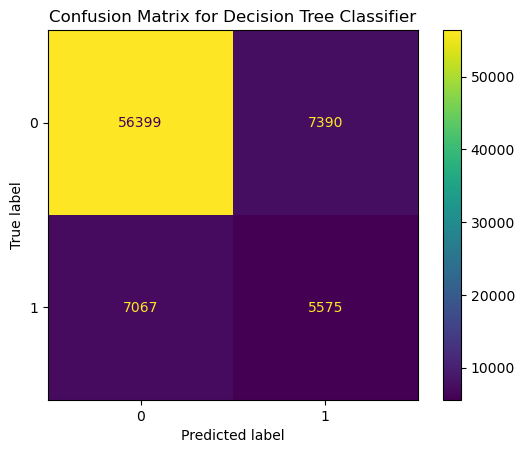

In [105]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

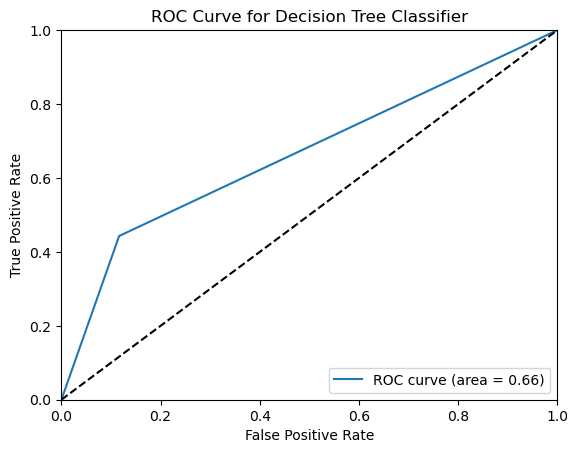

In [106]:
b = dtree.predict_proba(xdr_test)[:,1]
fpr, tpr, threshold = roc_curve(ydr_test, b)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %dtree_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

From our test, the Decision Tree ROC Curve score is 0.66. Our number is below the acceptable ratio. So we cannot use Decision Tree Classifier to determine the acceptance of Vehicle Insurance.

In general, an AUC of 0.5 suggests no discrimination as explained earlier. Our scores is around 0.66 which is below the 0.7 value. As explained earlier a value of 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding. So we still don't have a good model that can be accepted.

Reference: https://www.sciencedirect.com/science/article/pii/S1556086415306043

## Random Forest Classifier
We will now explore Random Forest Classifier model to see if this can help us get better results.

In [107]:
# Reset x and y to original form
x = df_train[ind_varx]
y = df_train['Response']

# Perform the Train Test Split for Random Forest Classifier needs
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier instance
rfc = RandomForestClassifier(n_estimators=100)

# Fit the Model
rfc.fit(xrf_train,yrf_train)  

RandomForestClassifier()

In [108]:
# Perform the Prediction on Test Data
rfc_predict = rfc.predict(xrf_test)                                

In [109]:
cm_rf = confusion_matrix(yrf_test, rfc_predict)

print(cm_rf)
print(classification_report(yrf_test, rfc_predict))

[[58975  4814]
 [ 7654  4988]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     63789
           1       0.51      0.39      0.44     12642

    accuracy                           0.84     76431
   macro avg       0.70      0.66      0.67     76431
weighted avg       0.82      0.84      0.83     76431



In [110]:
# Print the Accuracy, ROC AUC and F1 Score for Random Forest Classifier

rfc_accuracy = accuracy_score(yrf_test, rfc_predict)
rfc_roc_auc = roc_auc_score(yrf_test, rfc_predict)
rfc_f1_score = f1_score(yrf_test, rfc_predict)

print('Results for Random Forest Classifier')
print(f'Accuracy is: {rfc_accuracy:.2f}')
print(f'ROC AUC is : {rfc_roc_auc:.2f}')
print(f'F1 Score is : {rfc_f1_score:.2f}')

models.append('Random Forest Classifier')
accuracy_values.append(rfc_accuracy)
roc_auc_values.append(rfc_roc_auc)
f1_score_values.append(rfc_f1_score)

Results for Random Forest Classifier
Accuracy is: 0.84
ROC AUC is : 0.66
F1 Score is : 0.44


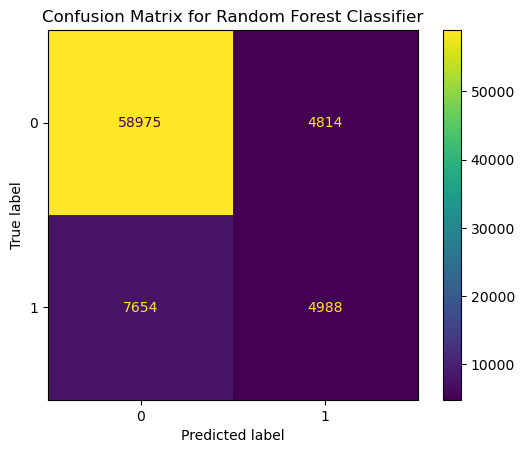

In [111]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

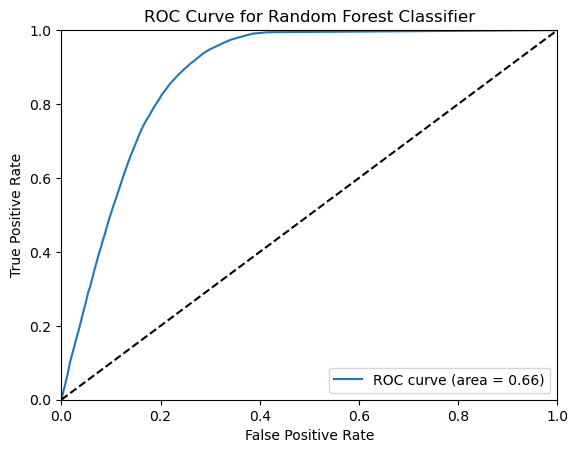

In [112]:
b = rfc.predict_proba(xrf_test)[:,1]
fpr, tpr, threshold = roc_curve(yrf_test, b)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %rfc_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [113]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

To vizualize the data, you need to install graphviz. Please also make sure you have enabled graphviz on the Anaconda Navigator Environment to visuazlize the data. I had to go through a few tries to get all the setting done before I could vizualize the data.

For Mac, you can install from
https://ports.macports.org/port/graphviz/

For Windows, you can install from
https://www.graphviz.org/download/

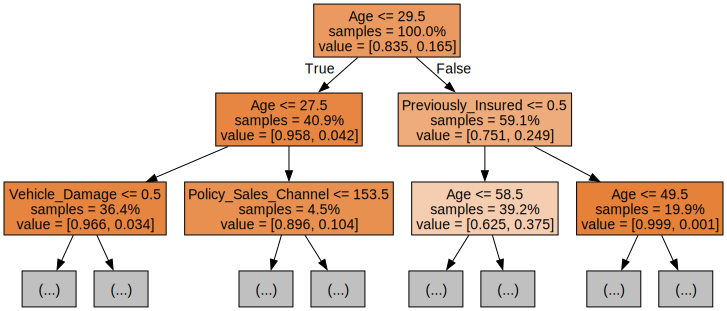

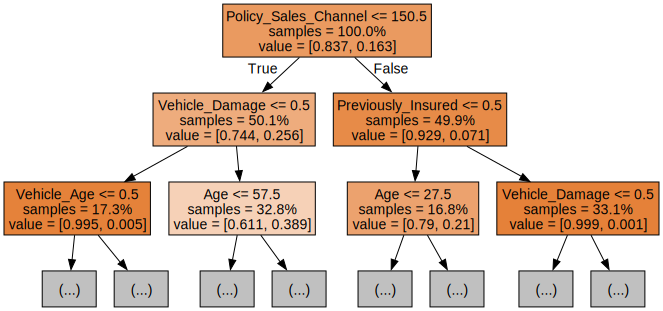

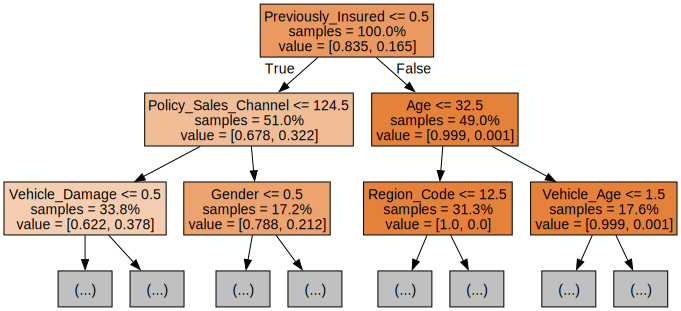

In [114]:
# Export the first three decision trees from the forest

for i in range(3):
    tree_viz = rfc.estimators_[i]
    dot_data = export_graphviz(tree_viz,
                               feature_names=xrf_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    fname = 'g' + str(i)+'.dot'
    graph.render(filename=fname)

In [115]:
rfc_roc_auc = roc_auc_score(yrf_test, rfc_predict)
print(f'Base Rate Accuracy is: {round(accuracy_score(yrf_test, rfc_predict)*100,2)}%')
print("Random Forest AUC = %0.2f" %rfc_roc_auc)

Base Rate Accuracy is: 83.69%
Random Forest AUC = 0.66


From our test, the Random Forest Classifer ROC Curve score is 0.66. Our number is below the acceptable ratio. So we cannot use Random Forest Classifier to determine the acceptance of Vehicle Insurance.

## RandomizedSearchCV

### Best Hyperparameters: Use RandomizedSearchCV for hyper parameter tuning

Let's further explore the option with RandomizedSearchCV to see if selecting a different value for n_estimator and maxdepth can improve the AUC score.

`n_estimators`: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.

`max_depth`: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

For our experiment, let's use `n_estimators` with a range of 100 to 400, and `max_depth` with a range of 1 to 20.

This will be a costly run but let's do it in the name of "AI/ML Experiments".

In [116]:
param_dist = {'n_estimators': randint(100,400),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rfcSVC = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfcSVC, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(xrf_train, yrf_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x158bd1db0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x158bd1c90>})

In [117]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
print(best_rf)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 362}
RandomForestClassifier(max_depth=18, n_estimators=362)


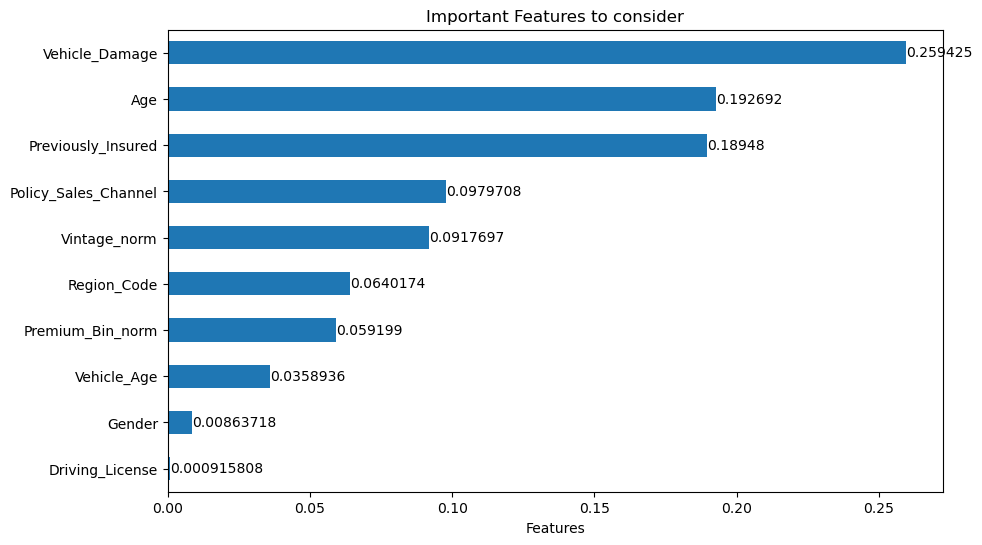

In [118]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, 
                                index=xdr_train.columns).sort_values(ascending=True)

# Plot a simple bar chart
ax = feature_importances.plot(kind='barh', figsize=(10,6), grid=False)
ax.bar_label(ax.containers[0], color='black')
plt.title('Important Features to consider')
plt.xlabel('Features')
plt.show()

In [119]:
# Perform the Predict
y_best_rand_pred = rand_search.predict(xrf_test)

In [120]:
# Calculate the Confusion Matrix

cm_best_rand = confusion_matrix(yrf_test, y_best_rand_pred)

# Print the Confusion Matrix and the Classificaiton Report

print(cm_best_rand)
print(classification_report(yrf_test, y_best_rand_pred))

[[59934  3855]
 [ 8017  4625]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     63789
           1       0.55      0.37      0.44     12642

    accuracy                           0.84     76431
   macro avg       0.71      0.65      0.67     76431
weighted avg       0.83      0.84      0.83     76431



In [121]:
# Print the Accuracy, ROC AUC and F1 Score for Randomized Search CV Random Forest Classifier

best_rand_accuracy = accuracy_score(yrf_test, y_best_rand_pred)
best_rand_roc_auc = roc_auc_score(yrf_test, y_best_rand_pred)
best_rand_f1_score = f1_score(yrf_test, y_best_rand_pred)

print('Results for Randomized Search CV')
print(f'Accuracy is: {best_rand_accuracy:.2f}')
print(f'ROC AUC is : {best_rand_roc_auc:.2f}')
print(f'F1 Score is : {best_rand_f1_score:.2f}')

models.append('Randomized Search CV')
accuracy_values.append(best_rand_accuracy)
roc_auc_values.append(best_rand_roc_auc)
f1_score_values.append(best_rand_f1_score)

Results for Randomized Search CV
Accuracy is: 0.84
ROC AUC is : 0.65
F1 Score is : 0.44


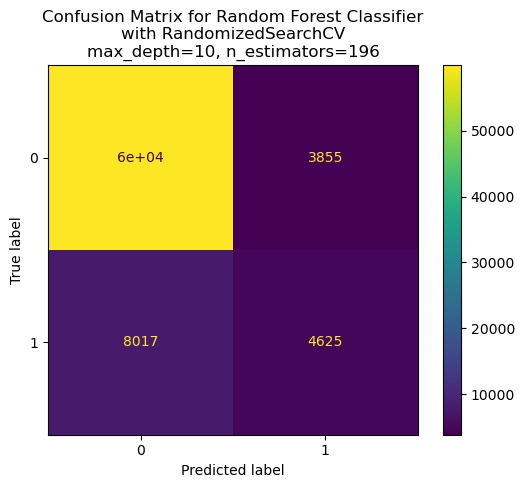

In [122]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_rand)
disp.plot()
plt.title('Confusion Matrix for Random Forest Classifier\nwith RandomizedSearchCV\nmax_depth=10, n_estimators=196')
plt.show()

## Extra Tree Classifier

In [123]:
# Create a Extra Tree Classifier

extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, 
                                         criterion ='entropy', 
                                         max_features = 2)

In [124]:
# Fit the Model

extra_tree_forest.fit(xrf_train, yrf_train)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

In [125]:
# Computing the importance of each feature

etc_feature_importance = extra_tree_forest.feature_importances_

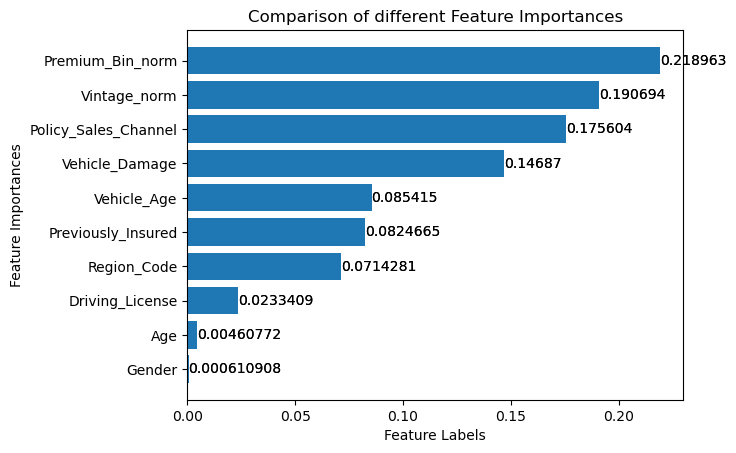

In [126]:
# Plotting a Bar Graph to compare the models

fig, ax = plt.subplots()
bars = ax.barh(xrf_train.columns, sorted(etc_feature_importance))

ax.bar_label(bars)

for bars in ax.containers:
    ax.bar_label(bars, color='black')

plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [127]:
# Perform the Predict

y_extra_tree_pred = extra_tree_forest.predict(xrf_test)

In [128]:
# Calculate the Confusion Matrix

cm_extra_tree = confusion_matrix(yrf_test, y_extra_tree_pred)

# Print the Confusion Matrix and the Classificaiton Report

print(cm_extra_tree)
print(classification_report(yrf_test, y_extra_tree_pred))

[[57967  5822]
 [ 7382  5260]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     63789
           1       0.47      0.42      0.44     12642

    accuracy                           0.83     76431
   macro avg       0.68      0.66      0.67     76431
weighted avg       0.82      0.83      0.82     76431



In [129]:
# Print the Accuracy, ROC AUC and F1 Score for Extra Tree Classifier

extra_accuracy = accuracy_score(yrf_test, y_extra_tree_pred)
extra_roc_auc = roc_auc_score(yrf_test, y_extra_tree_pred)
extra_f1_score = f1_score(yrf_test, y_extra_tree_pred)

print('Results for Extra Tree Classifier')
print(f'Accuracy is: {extra_accuracy:.2f}')
print(f'ROC AUC is : {extra_roc_auc:.2f}')
print(f'F1 Score is : {extra_f1_score:.2f}')

models.append('Extra Tree Classifer')
accuracy_values.append(extra_accuracy)
roc_auc_values.append(extra_roc_auc)
f1_score_values.append(extra_f1_score)

Results for Extra Tree Classifier
Accuracy is: 0.83
ROC AUC is : 0.66
F1 Score is : 0.44


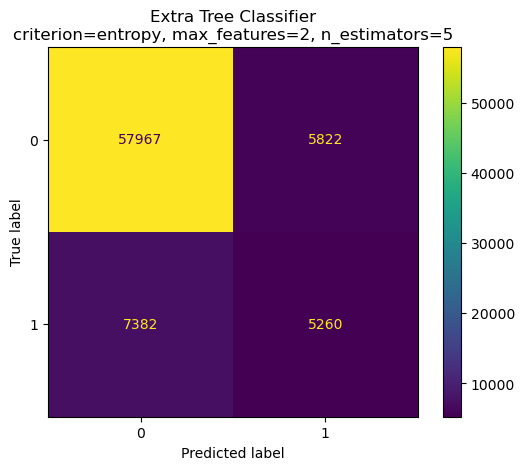

In [130]:
# Plot the Confusion Matrix for Extra Tree Classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm_extra_tree)
disp.plot()
plt.title('Extra Tree Classifier\ncriterion=entropy, max_features=2, n_estimators=5')
plt.show()

## Gaussian Naive Bayes model

In [131]:
# Reset x and y to original form
x = df_train[ind_varx]
y = df_train['Response']

# Perform the Train Test Split for Random Forest Classifier needs
xnb_train, xnb_test, ynb_train, ynb_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(xnb_train, ynb_train)

# Predict the response for test dataset
ynb_pred = gnb.predict(xnb_test)

In [132]:
# Calculate the Confusion Matrix

cm_nbayes = confusion_matrix(ynb_test, ynb_pred)

# Print the Confusion Matrix and the Classificaiton Report

print(cm_nbayes)
print(classification_report(ynb_test, ynb_pred))

[[41112 22677]
 [  178 12464]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78     63789
           1       0.35      0.99      0.52     12642

    accuracy                           0.70     76431
   macro avg       0.68      0.82      0.65     76431
weighted avg       0.89      0.70      0.74     76431



In [133]:
# Print the ROC AUC and Accuracy Percentage for Gaussian Naive Bayes

nbayes_accuracy = accuracy_score(ynb_test, ynb_pred)
nbayes_roc_auc = roc_auc_score(ynb_test, ynb_pred)
nbayes_f1_score = f1_score(ynb_test, ynb_pred)

print('Results for Gaussian Naive Bayes')
print(f'Accuracy is: {nbayes_accuracy:.2f}')
print(f'ROC AUC is : {nbayes_roc_auc:.2f}')
print(f'F1 Score is : {nbayes_f1_score:.2f}')

models.append('Gaussian Naive Bayes') 
accuracy_values.append(nbayes_accuracy)
roc_auc_values.append(nbayes_roc_auc)
f1_score_values.append(nbayes_f1_score)

Results for Gaussian Naive Bayes
Accuracy is: 0.70
ROC AUC is : 0.82
F1 Score is : 0.52


In [134]:
# Let's define the dictionary of all the values we captured
# Then let's convert that into a Pandas DataFrame to view all the values in tabluar format

prediction_dict = {'Accuracy' : accuracy_values,
                'ROC AUC'  : roc_auc_values,
                'F1 Score' : f1_score_values}

dx = pd.DataFrame(prediction_dict,index=models)

#models = ['K-nearest neighbors','Linear Regression','Logistic Regression',
#         'Decision Tree Classifier','Random Forest Classifier',
#         'Randomized Search CV', 'Extra Tree Classifer','Gaussian Naive Bayes' ]

In [135]:
#Let's print the tabular form of all the models and its scores

pd.set_option('display.precision', 2)
dx

,Accuracy,ROC AUC,F1 Score
K-nearest Neighbor,N/A,0.74,N/A
Linear Regression,N/A,0.85,N/A
Logistic Regression,0.83,0.50,0.02
Decision Tree Classifier,0.81,0.66,0.44
Random Forest Classifier,0.84,0.66,0.44
Randomized Search CV,0.84,0.65,0.44
Extra Tree Classifer,0.83,0.66,0.44
Gaussian Naive Bayes,0.7,0.82,0.52


#### Conclusion: 

Based on the ROC AUC, F1 Score, and Accuracy scores, Gausssian Naive Bayes is one of the option for us to use. We can also use Random Forest Classifier to make the determination.

K-nearest Neighbor was not providing a good response. We also struggled with Logistic Regression. There is more research to be done to see if there are alternate options to improve the results.

What suprised us is the results from Logistic Regression. From the class we learned the following:
- The independent variables must be unrelated to one another (this is correct)
- Large sample sizes are required for logistic regression (meets the criteria: 300k records)
- The dependant variable in binary logistic regression must be binary (this is correct - Yes or No)

The only item we may have missed is around which feature was used. This is an item we plan to explore further 
- Only the variables that are relevant should be included


##### Notes considered while working on the project:
The F1 score is calculated as the harmonic mean of the precision and recall scores, as shown below. It ranges from 0-100%, and a higher F1 score denotes a better quality classifier.

Accuracy scores are a metric used to evaluate the performance of classification models. The score ranges from 0 to 1, where 1 indicates perfect accuracy and 0 indicates complete failure. A score of over 90% is considered very good, while a score between 70% and 90% is considered good. However, depending on the model objectives, good accuracy may demand 99% accuracy and up.

AUC-ROC **“Area Under the Curve” (AUC) of the “Receiver Operating Characteristic” (ROC)** score shows how well the classifier distinguishes positive and negative classes. It can take values from 0 to 1. A higher ROC AUC indicates better performance. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5.

TPR - True Positive Rate (aka Recall or Sensitivity) measures the percentage of actual positives that have been correctly identified as positives.

FPR - False Positive Rate measures the percentage of actual negatives that have been incorrectly predicted as positives.

References: 

https://towardsdatascience.com/intuition-behind-roc-auc-score-1456439d1f30

https://www.analyticsvidhya.com/blog/2021/10/building-an-end-to-end-logistic-regression-model/

https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

https://www.analyticsvidhya.com/blog/2019/09/everything-know-about-p-value-from-scratch-data-science/

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

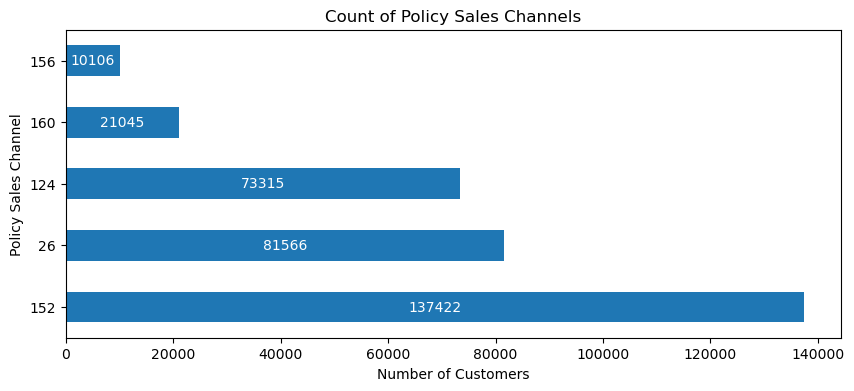

In [191]:
temp = df_train.groupby(['Policy_Sales_Channel'])['Policy_Sales_Channel'].count().sort_values(ascending=False)
temp.index = temp.index.astype(int)

ax = temp.head(5).plot(kind='barh', figsize=(10,4), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Count of Policy Sales Channels')
plt.xlabel('Number of Customers')
plt.ylabel('Policy Sales Channel')
plt.show()


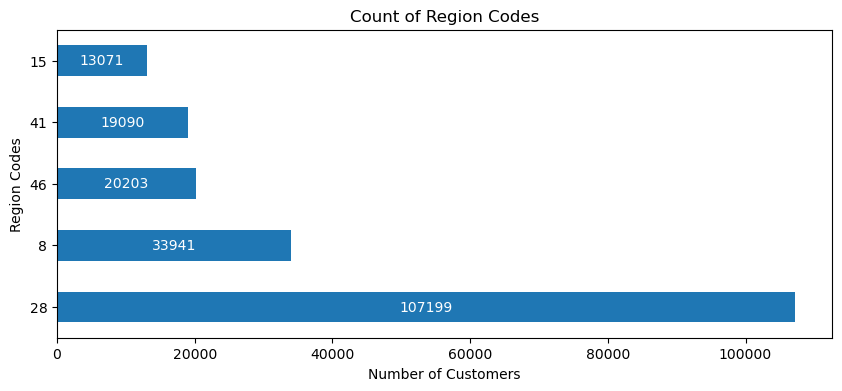

In [192]:
temp = df_train.groupby(['Region_Code'])['Region_Code'].count().sort_values(ascending=False)
temp.index = temp.index.astype(int)

ax = temp.head(5).plot(kind='barh', figsize=(10,4), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Count of Region Codes')
plt.xlabel('Number of Customers')
plt.ylabel('Region Codes')
plt.show()